# Obiettivo n°1
prevedere chi se ne andrà --> classificazione


In [46]:

%pwd

'g:\\Il mio Drive\\Bakcup\\GitHub\\UFS-04_CHURN-ANALISIS'

In [47]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from src.data.carica_dati import get_data

In [48]:
df = get_data()

In [49]:
X = df.iloc[:,:-1] #scegliere colonne
Y = df.Churn

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [80]:
model = RandomForestClassifier(max_depth= 15, n_estimators = 300)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, n_estimators=300)

In [81]:
pred = model.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
pred_train = model.predict(X_train)
pred_train

array([1, 1, 1, ..., 0, 0, 1])

In [73]:
pred_prob = model.predict_proba(X_test)
pred_prob = [1 if i > 0.7 else 0 for i in pred ]
pred_prob

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [83]:
accuracy_score(Y_test, pred)

0.7896233120113717

In [84]:
accuracy_score(Y_train, pred_train)

0.9927111111111111

In [71]:
confusion_matrix(Y_test, pred)


array([[936,  97],
       [195, 179]], dtype=int64)

In [85]:
confusion_matrix(Y_test, pred_prob)

array([[936,  97],
       [195, 179]], dtype=int64)

In [86]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid_params = {'n_estimators':[150,200,250,300],
               'max_depth':[15,20,25]}

model = RandomForestClassifier()

clf = GridSearchCV(model, param_grid=grid_params, n_jobs=-1, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [78]:
clf.best_params_


{'max_depth': 15, 'n_estimators': 300}

In [87]:
clf.best_score_

0.792234114936393

In [95]:
df_res = pd.DataFrame(clf.cv_results_)
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.889805,0.459858,0.234308,0.045639,15,150,"{'max_depth': 15, 'n_estimators': 150}",0.791045,0.794598,0.777383,0.802987,0.784495,0.790102,0.008722,4
1,5.000884,0.820354,0.278542,0.069027,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.792466,0.797441,0.770270,0.798720,0.793741,0.790528,0.010386,3
2,5.394559,0.494239,0.413139,0.180706,15,250,"{'max_depth': 15, 'n_estimators': 250}",0.793177,0.795309,0.770270,0.803698,0.794452,0.791381,0.011185,2
3,10.062883,1.889825,0.579681,0.090404,15,300,"{'max_depth': 15, 'n_estimators': 300}",0.793888,0.800284,0.774538,0.794452,0.798009,0.792234,0.009154,1
4,5.543757,1.128423,0.358943,0.059260,20,150,"{'max_depth': 20, 'n_estimators': 150}",0.789623,0.790334,0.769559,0.794452,0.793030,0.787400,0.009092,10
5,6.722057,0.515805,0.370861,0.059430,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.795309,0.794598,0.768137,0.796586,0.792319,0.789390,0.010717,5
6,7.144861,0.560945,0.454715,0.122498,20,250,"{'max_depth': 20, 'n_estimators': 250}",0.788913,0.798152,0.769559,0.794452,0.795164,0.789248,0.010287,6
7,8.075982,0.540139,0.460603,0.045159,20,300,"{'max_depth': 20, 'n_estimators': 300}",0.790334,0.796020,0.766714,0.792319,0.795875,0.788252,0.010984,8
8,3.826004,0.321891,0.307001,0.126992,25,150,"{'max_depth': 25, 'n_estimators': 150}",0.783227,0.798152,0.767425,0.793030,0.788051,0.785977,0.010526,12
9,7.217089,1.319541,0.417635,0.123458,25,200,"{'max_depth': 25, 'n_estimators': 200}",0.791045,0.793888,0.768848,0.791607,0.800142,0.789106,0.010631,7


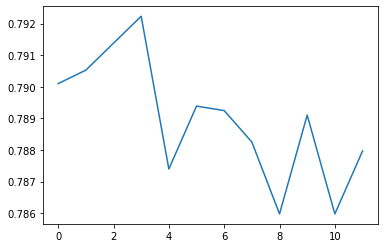

In [97]:

plt.plot(df_res.mean_test_score)
